In [1]:
%matplotlib inline
#mpld3.enable_notebook()
import numpy as np
import pandas as pd
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import xarray as xr
import seaborn as sns

In [2]:
# Load in merged data
netcdf_file = r'F:\Work\e\Data\Obs\Canada_Project_Sites\CSAS_data\QC\Hourly_QC.nc'
ds = xr.open_dataset(netcdf_file)
# Load in dem
dem_file = r'F:\Work\e\Data\DEMs\NA.tif'
dem = xr.open_rasterio(dem_file).sel(band=1).drop('band')
# provesces
p_file = r'F:\Work\e\Data\Shape_files\CAN_adm1.shp'

In [3]:
lat_r = ds.Lat.max()-ds.Lat.min()
lon_r = ds.Lon.max()-ds.Lon.min()
bdy = 0.2
box = [ds.Lon.min()-lon_r*bdy, ds.Lon.max()+lon_r*bdy, ds.Lat.min()-lat_r*bdy, ds.Lat.max()+lat_r*bdy]
# box = [ds.Lon.min(), ds.Lon.max(), ds.Lat.min(), ds.Lat.max()]

In [4]:
box

[<xarray.DataArray 'Lon' ()>
 array(-133.504698), <xarray.DataArray 'Lon' ()>
 array(-110.810985), <xarray.DataArray 'Lat' ()>
 array(47.208006134), <xarray.DataArray 'Lat' ()>
 array(59.359221196)]

In [5]:
# Set nan in dem
dem = dem.where(dem>0)
dem = dem.where((dem.x>box[0]) & (dem.x<box[1]) & (dem.y>box[2]) & (dem.y<box[3]), drop=True)

In [6]:
p_sh = list(shpreader.Reader(p_file).geometries())

In [7]:
cmap_elev = mpl.colors.ListedColormap(sns.color_palette("Greys", 10))
cmap_network = {'bcRiverForecastCenter':'r', 'environmentAlberta':'k'}

In [8]:
sns.set_style('whitegrid')
sns.set_context("talk", font_scale=2, rc={"lines.linewidth": 2})

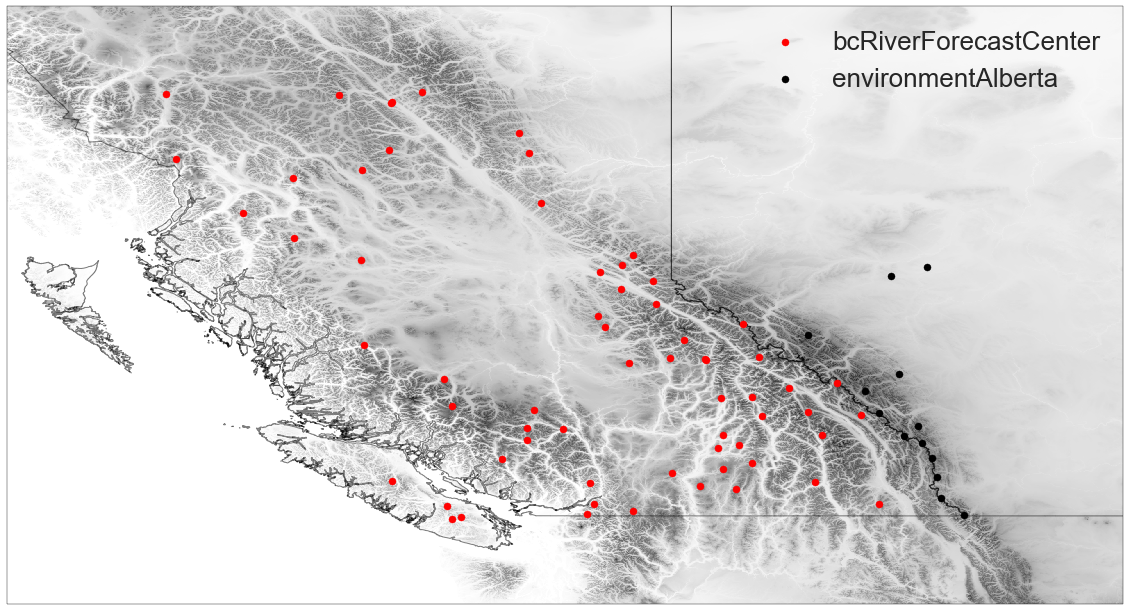

In [9]:
fig = plt.figure(figsize=(20, 20))
ax1 = plt.axes(projection=ccrs.AlbersEqualArea())
# ax1.set_extent(box)
ax1.imshow(np.flipud(dem.values), extent=[np.min(dem.x), np.max(dem.x),
                                             np.min(dem.y), np.max(dem.y)], aspect=ax1.get_aspect())
# ax1.set_title('Elevation')
for c_net in set(ds.network.values):
    lat_pts = ds.Lat.sel(staID=(ds.where(ds.network==c_net, drop=True).network).staID).values
    lon_pts = ds.Lon.sel(staID=(ds.where(ds.network==c_net, drop=True).network).staID).values
    I_not_nan = ~np.isnan(lat_pts) & ~np.isnan(lon_pts)
    lat_pts = lat_pts[I_not_nan]
    lon_pts = lon_pts[I_not_nan]
    
    ax1.scatter(lon_pts, lat_pts, transform=ccrs.AlbersEqualArea(), s=50, c=cmap_network[c_net], zorder=100, label=c_net) #yc, xc -- lists or numpy arrays

ax1.add_geometries(p_sh, ccrs.AlbersEqualArea(),
                  edgecolor='black', facecolor='none', alpha=0.5)
plt.legend()

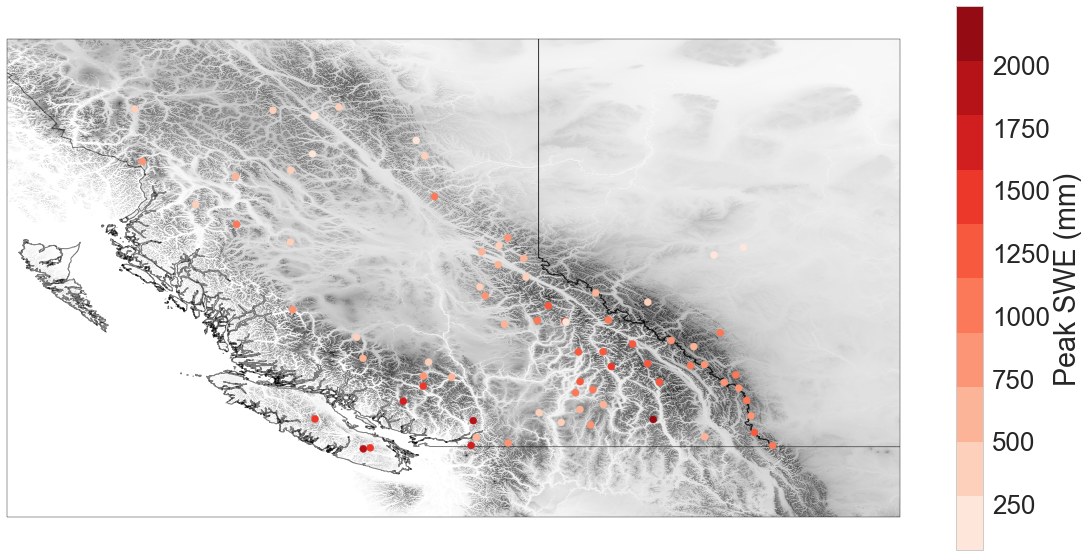

In [10]:
fig = plt.figure(figsize=(20, 10))
ax1 = plt.axes(projection=ccrs.AlbersEqualArea())
# ax1.set_extent(box)
ax1.imshow(np.flipud(dem.values), extent=[np.min(dem.x), np.max(dem.x),
                                             np.min(dem.y), np.max(dem.y)], aspect=ax1.get_aspect())

swe_max = ds.SWE.max(dim='Time_UTC')
lat_pts = swe_max.Lat.values
lon_pts = swe_max.Lon.values

I_not_nan = ~np.isnan(lat_pts) & ~np.isnan(lon_pts) & ~np.isnan(swe_max.values)
lat_pts = lat_pts[I_not_nan]
lon_pts = lon_pts[I_not_nan]
c_swe   = swe_max[I_not_nan].values
cmapblues = mpl.colors.ListedColormap(sns.color_palette("Reds", 10))


p1 = ax1.scatter(lon_pts, lat_pts, transform=ccrs.AlbersEqualArea(), s=50, c=c_swe, cmap=cmapblues, zorder=100) #yc, xc -- lists or numpy arrays

ax1.add_geometries(p_sh, ccrs.AlbersEqualArea(),
                  edgecolor='black', facecolor='none', alpha=0.5)
c0 = fig.colorbar(p1, ax=ax1, orientation="vertical", label='Peak SWE (mm)')

C:\Users\new356\Anaconda3\lib\site-packages\xarray\core\variable.py:1164: RuntimeWarning: invalid value encountered in greater
  if not reflexive
C:\Users\new356\Anaconda3\lib\site-packages\xarray\core\variable.py:1164: RuntimeWarning: invalid value encountered in less
  if not reflexive


202.55007952381933
463.21106802037605
673.1861812163839


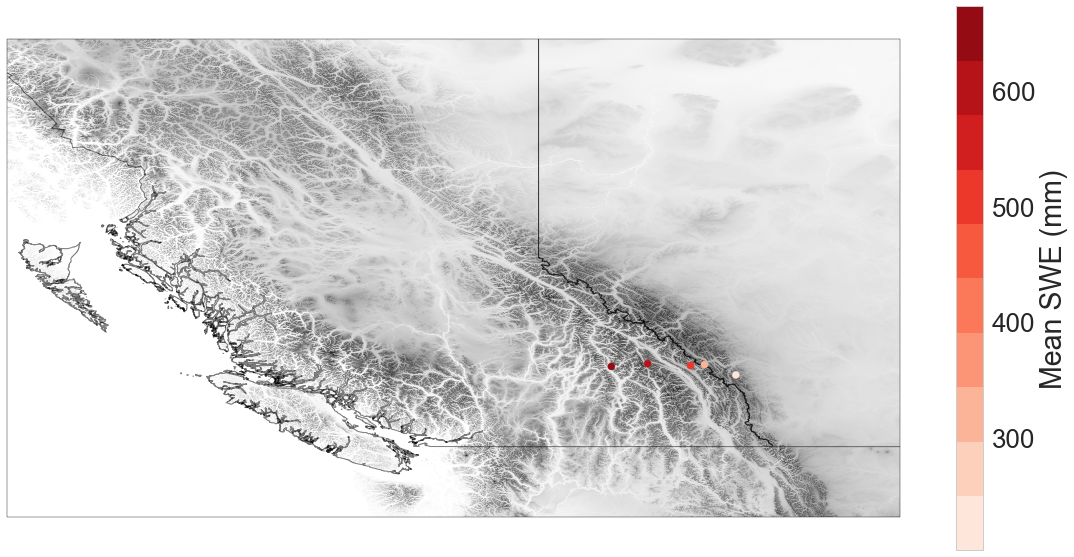

In [11]:
fig = plt.figure(figsize=(20, 10))
ax1 = plt.axes(projection=ccrs.AlbersEqualArea())
# ax1.set_extent(box)
ax1.imshow(np.flipud(dem.values), extent=[np.min(dem.x), np.max(dem.x),
                                             np.min(dem.y), np.max(dem.y)], aspect=ax1.get_aspect())

swe_mean = ds.SWE.mean(dim='Time_UTC')
swe_mean = swe_mean.where((swe_mean.Lat>50.7467287151959) & (swe_mean.Lat<51.2770940589401) & 
                          (swe_mean.Lon>-119.135830621329) & (swe_mean.Lon<-113.917157809765), drop=True)
lat_pts = swe_mean.Lat.values
lon_pts = swe_mean.Lon.values

I_not_nan = ~np.isnan(lat_pts) & ~np.isnan(lon_pts) & ~np.isnan(swe_mean.values)
lat_pts = lat_pts[I_not_nan]
lon_pts = lon_pts[I_not_nan]
c_swe   = swe_mean[I_not_nan].values
cmapblues = mpl.colors.ListedColormap(sns.color_palette("Reds", 10))


p1 = ax1.scatter(lon_pts, lat_pts, transform=ccrs.AlbersEqualArea(), s=50, c=c_swe, cmap=cmapblues, zorder=100) #yc, xc -- lists or numpy arrays

ax1.add_geometries(p_sh, ccrs.AlbersEqualArea(),
                  edgecolor='black', facecolor='none', alpha=0.5)
c0 = fig.colorbar(p1, ax=ax1, orientation="vertical", label='Mean SWE (mm)')
print(swe_mean.min().values)
print(swe_mean.mean().values)
print(swe_mean.max().values)
                        

In [12]:
X = ds.SWE.where((swe_mean.Lat>50.7467287151959) & (swe_mean.Lat<51.2770940589401) & 
                          (swe_mean.Lon>-119.135830621329) & (swe_mean.Lon<-113.917157809765), drop=True)
X.station_name

<xarray.DataArray 'station_name' (staID: 5)>
array([array('Sunshine Village', dtype=object),
       array('Little Elbow Summit', dtype=object),
       array('Mount Revelstoke', dtype=object),
       array('Caribou Creek Upper', dtype=object),
       array('Floe Lake', dtype=object)], dtype=object)
Coordinates:
  * staID         (staID) object '05BB803' '05BJ805' '2A06P' '2A31P' '2C14P'
    station_name  (staID) object Sunshine Village Little Elbow Summit ...
    Lat           (staID) float64 51.08 50.82 51.04 51.11 51.06
    Lon           (staID) float64 -115.8 -115.0 -118.2 -117.2 -116.1
    Elevation     (staID) float64 2.23e+03 2.12e+03 1.85e+03 2.201e+03 2.09e+03
    network       (staID) object 'environmentAlberta' 'environmentAlberta' ...

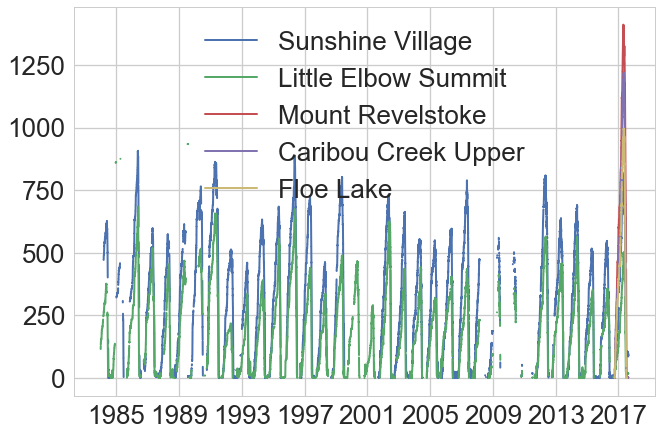

In [15]:
plt.figure()
for staID in X.staID:
    plt.plot(ds.Time_UTC, X.sel(staID=staID), label=staID.station_name.values)
plt.legend()